# Wine Data Wrangling and Exploration
The purpose of this notebook is to adequately understand, describe, and explore the wine data set that will be used in this project.

In [1]:
import os
while os.path.basename(os.getcwd()) != 'CSDGAN':
    os.chdir('..')
from utils.data_loading import load_raw_dataset, save_processed_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing data
Note that I have written a helper function to load in the desired data set. If you have not already downloaded
the data sets to the appropriate directory, this can be done simply by running the following code:

In [2]:
wine = load_raw_dataset('wine')
wine.head()

,class,alcohol,malic_acid,ash,alkalinity,magnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,dilution,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Inspecting the data

In [3]:
print(wine.shape)
wine.describe()

(178, 14)


,class,alcohol,malic_acid,ash,alkalinity,magnesium,phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,dilution,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We have a total of 13 features, along with a class label. There is no missing data present.

In [4]:
wine.groupby('class').size()

class
1    59
2    71
3    48
dtype: int64

This is a slightly imbalanced classification problem. There exists a fairly low number of observations, just like the iris data set.

### Visualizing the data

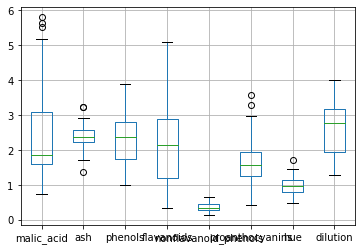

In [5]:
wine.drop(columns=['class','alcohol','proline','magnesium','alkalinity','color_intensity']).boxplot()

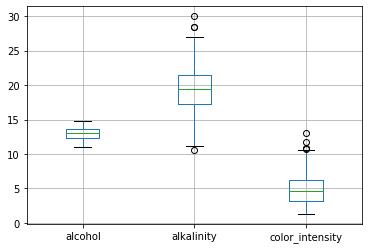

In [6]:
wine[['alcohol','alkalinity','color_intensity']].boxplot()

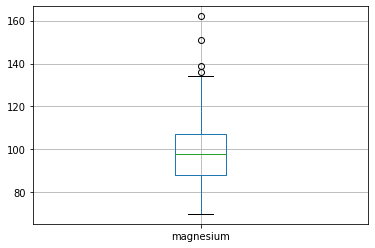

In [7]:
wine[['magnesium']].boxplot()

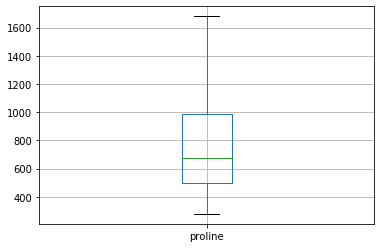

In [8]:
wine[['proline']].boxplot()

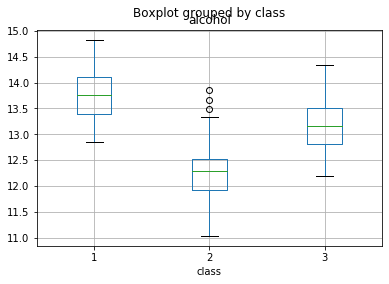

In [9]:
wine.boxplot('alcohol', 'class')
plt.show()

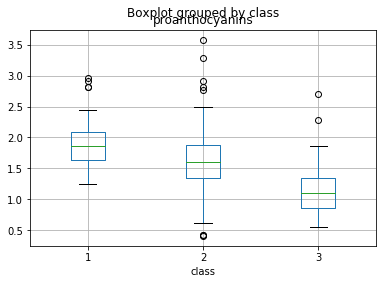

In [10]:
wine.boxplot('proanthocyanins', 'class')
plt.show()

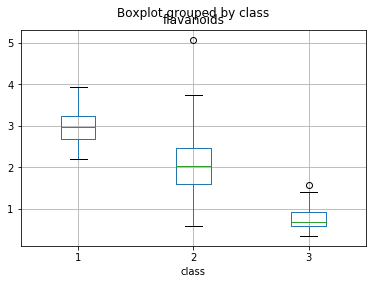

In [11]:
wine.boxplot('flavanoids', 'class')
plt.show()

These box plots are promising. This data looks very straightforward, similar to the iris data set. Since there are no missing values and no concerning outliers, I will move on to a more complicated data set.

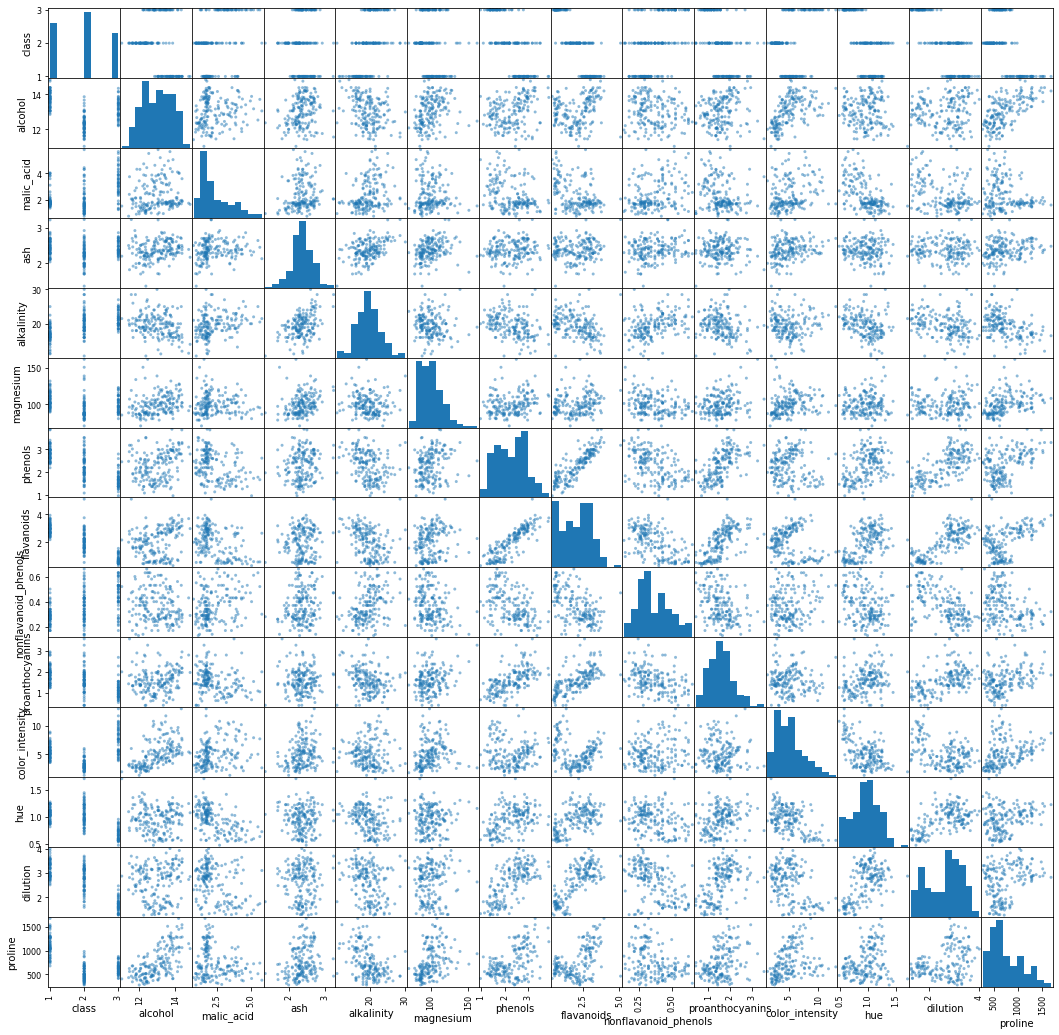

In [12]:
%matplotlib inline
pd.plotting.scatter_matrix(wine, figsize=(18, 18))
plt.show()

In [13]:
save_processed_dataset('wine', wine)